In [1]:
import pandas as pd         
import numpy as np            
import matplotlib.pyplot as plt        
import seaborn as sns 

In [2]:
df = pd.read_csv("drone_meta_data.csv")

In [3]:
df.head()

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_seaLevel(feet),height_sonar(feet),speed(mph),...,voltageCell4,voltageCell5,voltageCell6,current(A),battery_temperature(f),altitude(feet),ascent(feet),flycStateRaw,flycState,message
0,0,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,0.000,84.11,893.551412,0.0,41,Motors_Started,NaN
1,100,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,0.000,84.11,893.551412,0.0,41,Motors_Started,NaN
2,200,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...
3,300,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,NaN
4,400,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,4.264,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,NaN


In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['time(millisecond)', 'datetime(utc)', 'latitude', 'longitude',
       'height_above_takeoff(feet)',
       'height_above_ground_at_drone_location(feet)',
       'ground_elevation_at_drone_location(feet)',
       'altitude_above_sealevel(feet)', 'height_sonar(feet)', 'speed(mph)',
       'distance(feet)', 'mileage(feet)', 'satellites', 'gpslevel',
       'voltage(v)', 'max_altitude(feet)', 'max_ascent(feet)',
       'max_speed(mph)', 'max_distance(feet)', 'xspeed(mph)', 'yspeed(mph)',
       'zspeed(mph)', 'compass_heading(degrees)', 'pitch(degrees)',
       'roll(degrees)', 'isphoto', 'isvideo', 'rc_elevator', 'rc_aileron',
       'rc_throttle', 'rc_rudder', 'rc_elevator(percent)',
       'rc_aileron(percent)', 'rc_throttle(percent)', 'rc_rudder(percent)',
       'gimbal_heading(degrees)', 'gimbal_pitch(degrees)',
       'gimbal_roll(degrees)', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'curren

In [5]:
df.isna().sum()

time(millisecond)                                 0
datetime(utc)                                     0
latitude                                          0
longitude                                         0
height_above_takeoff(feet)                        0
height_above_ground_at_drone_location(feet)       0
ground_elevation_at_drone_location(feet)          0
altitude_above_sealevel(feet)                     0
height_sonar(feet)                                0
speed(mph)                                        0
distance(feet)                                    0
mileage(feet)                                     0
satellites                                        0
gpslevel                                          0
voltage(v)                                        0
max_altitude(feet)                                0
max_ascent(feet)                                  0
max_speed(mph)                                    0
max_distance(feet)                                0
xspeed(mph) 

In [6]:
df = df.dropna()

In [7]:
print(df.shape)

(19, 52)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2 to 3668
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time(millisecond)                            19 non-null     int64  
 1   datetime(utc)                                19 non-null     object 
 2   latitude                                     19 non-null     float64
 3   longitude                                    19 non-null     float64
 4   height_above_takeoff(feet)                   19 non-null     float64
 5   height_above_ground_at_drone_location(feet)  19 non-null     float64
 6   ground_elevation_at_drone_location(feet)     19 non-null     float64
 7   altitude_above_sealevel(feet)                19 non-null     float64
 8   height_sonar(feet)                           19 non-null     float64
 9   speed(mph)                                   19 non-null     float64
 10  distanc

<Axes: >

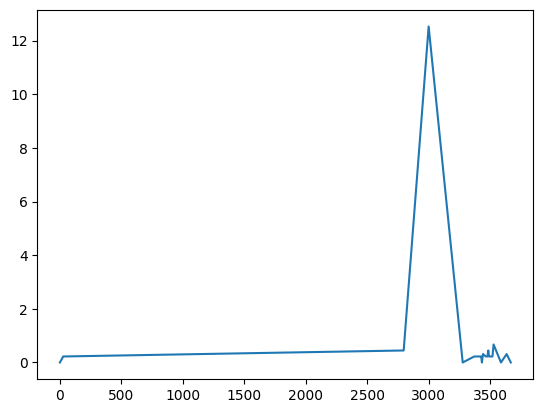

In [9]:
df["speed(mph)"].plot(kind="line")

In [ ]:
df["isflying"] = ["flying" if speed > 0 else "not_flying" for speed in df["speed(mph)"]]
df["isflying"]

2       not_flying
29          flying
2797        flying
3000        flying
3277    not_flying
3371        flying
3425        flying
3428        flying
3433    not_flying
3442        flying
3465        flying
3478        flying
3485        flying
3491        flying
3519        flying
3528        flying
3588    not_flying
3634        flying
3668    not_flying
Name: isflying, dtype: object

In [13]:
df.head(4)

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),...,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw,flycstate,message,isflying
2,200,7/12/2021 19:52,38.104154,-84.757244,0.000000,0.000000,893.551412,893.551412,0.328084,0.000000,...,0,0,1.218,84.11,893.551412,0.000000,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...,not_flying
29,3200,7/12/2021 19:52,38.104155,-84.757244,2.296588,2.329396,893.518604,895.848000,2.952756,0.223694,...,0,0,3.480,84.11,895.848000,2.296588,6,P-GPS,Home Point recorded. Return-to-Home Altitude:1...,flying
2797,301300,7/12/2021 19:57,38.105495,-84.757316,10.826772,19.586615,884.791569,904.378184,26.902888,0.447388,...,0,0,11.024,107.51,904.378184,10.826772,15,Go_Home,Aircraft is returning to the Home Point. RTH A...,flying
3000,323400,7/12/2021 19:57,38.105420,-84.757320,164.698168,173.720478,884.529102,1058.249580,0.000000,12.526864,...,0,0,13.740,109.31,1058.249580,164.698168,15,Go_Home,Forward Obstacle Sensing is not functioning.,flying


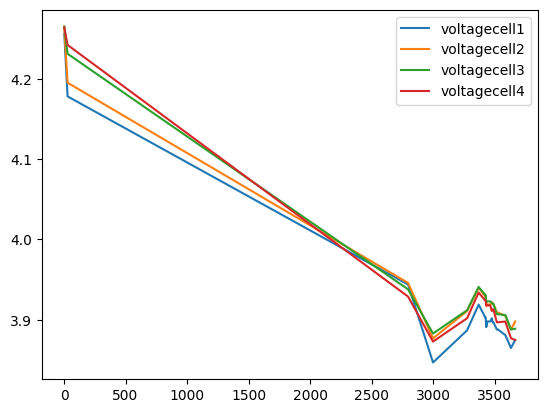

In [ ]:
df["voltagecell1"].plot(kind="line")
df["voltagecell2"].plot(kind="line")
df["voltagecell3"].plot(kind="line")
df["voltagecell4"].plot(kind="line")
plt.legend()
plt.show()

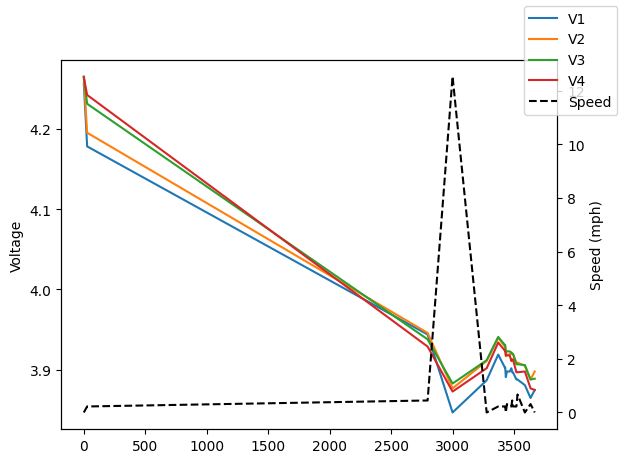

In [35]:
fig, ax1 = plt.subplots()

df["voltagecell1"].plot(ax=ax1, label="V1")
df["voltagecell2"].plot(ax=ax1, label="V2")
df["voltagecell3"].plot(ax=ax1, label="V3")
df["voltagecell4"].plot(ax=ax1, label="V4")

ax1.set_ylabel("Voltage")

ax2 = ax1.twinx()
df["speed(mph)"].plot(ax=ax2, color="black", linestyle="--", label="Speed")

ax2.set_ylabel("Speed (mph)")

fig.legend(loc="upper right")
plt.show()


In [14]:
df["flycstate"].unique()

array(['Motors_Started', 'P-GPS', 'Go_Home', 'AutoLanding'], dtype=object)

In [15]:
df[df["flycstate"] == "Motors_Started"]

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_sealevel(feet),height_sonar(feet),speed(mph),...,voltagecell5,voltagecell6,current(a),battery_temperature(f),altitude(feet),ascent(feet),flycstateraw,flycstate,message,isflying
2,200,7/12/2021 19:52,38.104154,-84.757244,0.0,0.0,893.551412,893.551412,0.328084,0.0,...,0,0,1.218,84.11,893.551412,0.0,41,Motors_Started,Setting new Return-To-Home altitude to 50m (16...,not_flying


In [18]:
df_num = df.select_dtypes(include=["int64", "float64"])

In [19]:
sns.pairplot(data=df_num)
plt.show()